In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  
import numpy as np

**K Means clustering**

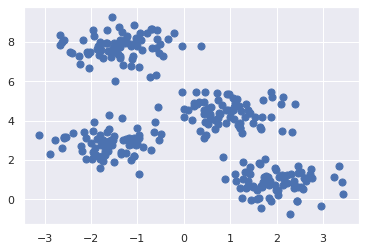

In [10]:
# from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [12]:
y_kmeans

array([1, 2, 0, 2, 1, 1, 3, 0, 2, 2, 3, 2, 0, 2, 1, 0, 0, 1, 3, 3, 1, 1,
       0, 3, 3, 0, 1, 0, 3, 0, 2, 2, 0, 2, 2, 2, 2, 2, 3, 1, 0, 3, 0, 0,
       3, 3, 2, 3, 2, 1, 3, 1, 2, 1, 1, 3, 2, 3, 2, 1, 2, 0, 2, 3, 3, 3,
       2, 1, 2, 3, 0, 3, 2, 3, 3, 2, 3, 0, 1, 2, 1, 0, 1, 1, 2, 0, 1, 0,
       2, 2, 0, 1, 2, 3, 3, 0, 1, 1, 0, 3, 2, 1, 2, 1, 0, 1, 1, 0, 2, 0,
       3, 3, 1, 2, 1, 0, 2, 1, 1, 0, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3, 2, 3,
       3, 1, 2, 3, 3, 2, 0, 2, 2, 3, 0, 3, 0, 3, 2, 0, 2, 2, 2, 0, 2, 0,
       1, 3, 2, 3, 1, 0, 2, 0, 0, 1, 0, 3, 3, 0, 1, 0, 0, 2, 1, 0, 3, 2,
       1, 1, 0, 3, 1, 0, 3, 3, 0, 0, 0, 0, 1, 2, 0, 3, 0, 0, 3, 3, 3, 0,
       3, 2, 0, 3, 1, 3, 0, 2, 3, 2, 0, 2, 0, 3, 0, 0, 2, 3, 3, 1, 1, 0,
       2, 1, 1, 3, 1, 3, 0, 2, 2, 0, 0, 2, 0, 1, 3, 0, 1, 3, 2, 3, 1, 0,
       1, 2, 2, 2, 2, 3, 3, 2, 0, 3, 1, 0, 3, 3, 3, 1, 1, 2, 0, 0, 3, 1,
       2, 3, 0, 2, 0, 1, 1, 3, 3, 0, 1, 1, 1, 0, 2, 2, 1, 1, 0, 1, 1, 1,
       2, 3, 2, 0, 1, 1, 2, 2, 2, 1, 1, 0, 2, 3], d

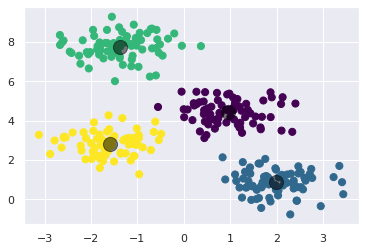

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

Như vậy là chúng ta đã phân cụm xong với số cụm là 4 trên data mẫu, đương nhiên chúng ta được kết quả đẹp như vậy là do máy đã tự động tạo ra dữ liệu với số cụm là 4 để chúng ta thực hành. 

Thực tế, để chọn ra cơ số K phù hợp, chúng ta sẽ tiến hành 2 test là elbow test và silhouette coefficient

In [14]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [16]:
features, true_labels = make_blobs(n_samples=200,centers=3,cluster_std=2.75,random_state=42)

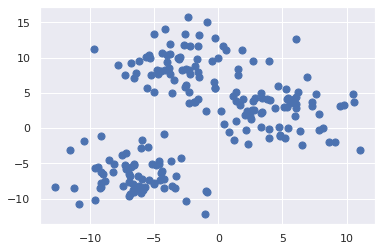

In [17]:
plt.scatter(features[:, 0], features[:, 1], s=50);

In [19]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [20]:
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)

In [21]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [23]:
kmeans.cluster_centers_

array([[-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732],
       [ 1.19539276,  0.13158148]])

In [24]:
kmeans.n_iter_

2

In [25]:
y_kmeans = kmeans.predict(scaled_features)

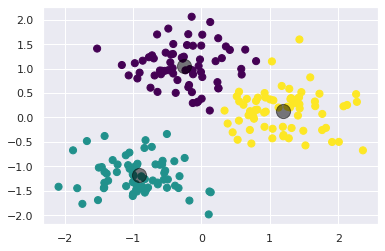

In [26]:
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

=> Như vậy , sau 2 vòng lặp , Chúng ta đã được kết quả như trên

In [27]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
 kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
 kmeans.fit(scaled_features)
 sse.append(kmeans.inertia_)

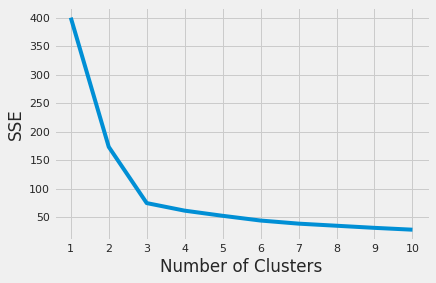

In [28]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [29]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

kl.elbow

3

In [30]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
 kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
 kmeans.fit(scaled_features)
 score = silhouette_score(scaled_features, kmeans.labels_)
 silhouette_coefficients.append(score)

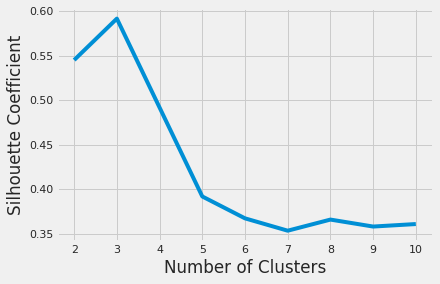

In [31]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

=> Như vậy, cả inertia và Silhouette test đều cho kết quả tại K = 3 thì tối ưu nhất 

Tuy nhiên, đây vẫn chỉ là data test được máy tạo ra, đối với data thật thì chúng ta sẽ thấy rõ sự khác nhau hơn. Nhưng nhìn chung thì cách làm là vậy

Test thử với tập khách hàng mua sắm 

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
dataset = pd.read_csv('https://raw.githubusercontent.com/srafay/Machine_Learning_A-Z/master/Part%204%20-%20Clustering/Section%2024%20-%20K-Means%20Clustering/Mall_Customers.csv')

In [34]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [35]:
dataset.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [36]:
dataset["Genre"] = dataset["Genre"].astype('category')

In [38]:
dataset.dtypes

CustomerID                   int64
Genre                     category
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
dtype: object

In [37]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [39]:
dataset["Gender"] = dataset["Genre"].cat.codes

In [40]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Gender
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,1


In [41]:
dataset.drop(columns = ['CustomerID','Genre'],inplace=True)

In [42]:
dataset.head(5)

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [61]:
dataset.describe()

,Age,Annual Income (k$),Spending Score (1-100),Gender
count,200.000000,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000,0.440000
std,13.969007,26.264721,25.823522,0.497633
min,18.000000,15.000000,1.000000,0.000000
25%,28.750000,41.500000,34.750000,0.000000
50%,36.000000,61.500000,50.000000,0.000000
75%,49.000000,78.000000,73.000000,1.000000
max,70.000000,137.000000,99.000000,1.000000


In [44]:
X = dataset.iloc[:].values

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

In [47]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


In [49]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
 kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
 kmeans.fit(scaled_features)
 sse.append(kmeans.inertia_)

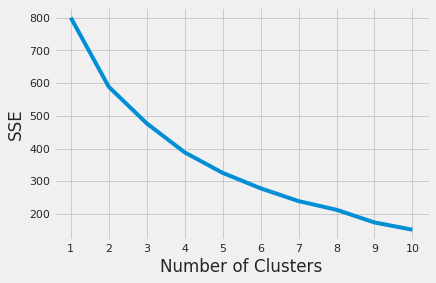

In [50]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [51]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

kl.elbow

4

In [53]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
 kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
 kmeans.fit(scaled_features)
 score = silhouette_score(scaled_features, kmeans.labels_)
 silhouette_coefficients.append(score)

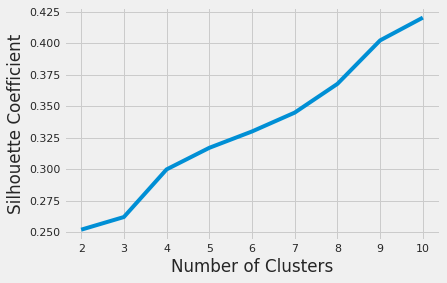

In [54]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

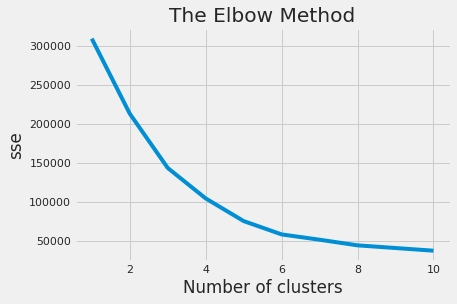

In [55]:
sse_2 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    sse_2.append(kmeans.inertia_)
plt.plot(range(1, 11), sse_2)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('sse')
plt.show()

In [56]:
kl = KneeLocator(range(1, 11), sse_2, curve="convex", direction="decreasing")

kl.elbow

4

Như vậy sau 3 bài test , thì chúng ta thấy khu vực từ k = 4 tới k = 6 là cluster được kết quả tốt nhất

Test k = 4 

In [57]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [58]:
y_kmeans == 0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False,

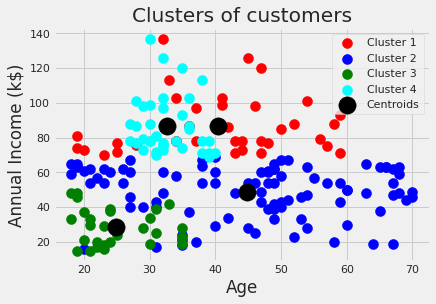

In [62]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

Test k = 5 

In [63]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

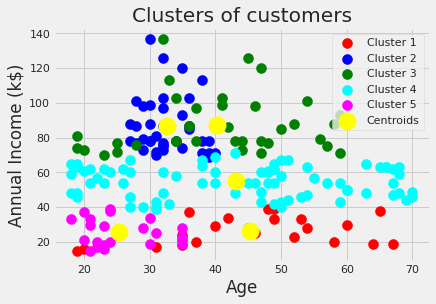

In [64]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

Test k = 6 

In [65]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

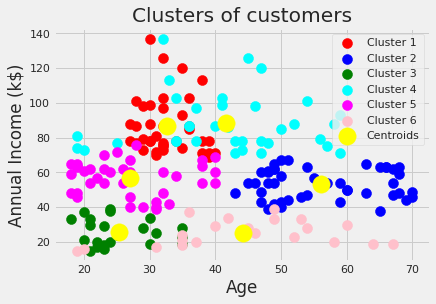

In [66]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'pink', label = 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

**Hierarchical Clustering**

In [67]:
data = pd.read_csv('https://raw.githubusercontent.com/maxtran1997gmail/Files/main/Wholesale%20customers%20data.csv')

In [68]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [69]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


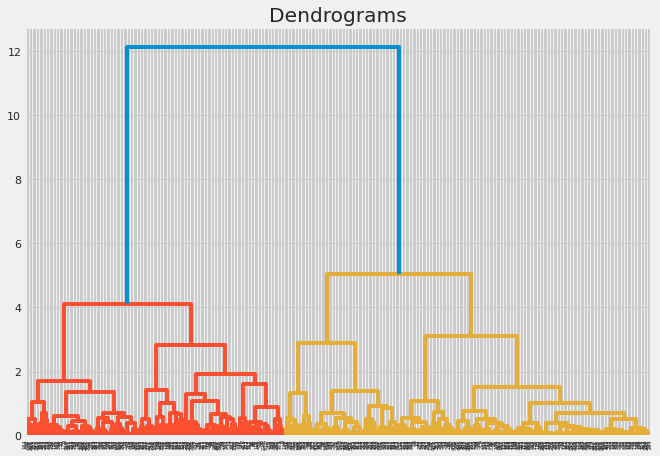

In [70]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

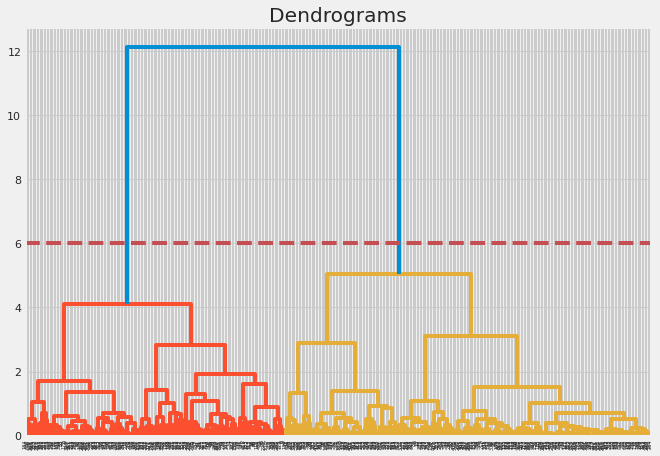

In [71]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [72]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

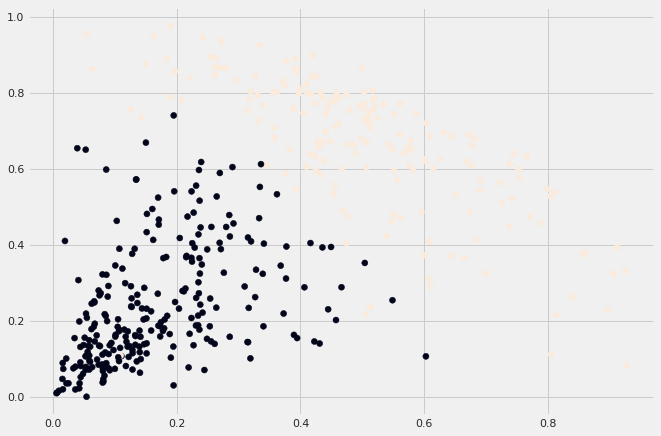

In [73]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_)

**probabilistic clustering**

In [74]:
data = pd.read_csv('https://raw.githubusercontent.com/maxtran1997gmail/Files/main/Clustering_gmm.csv')

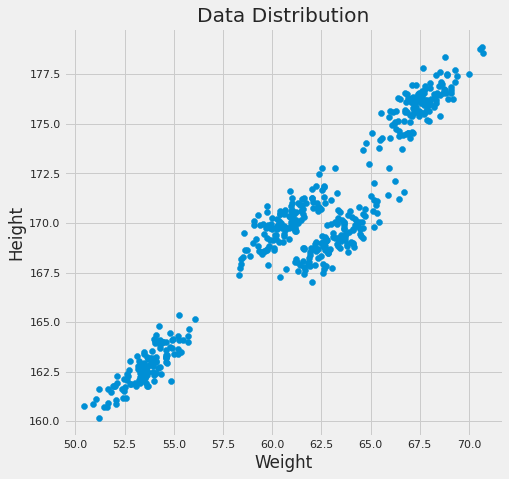

In [75]:
plt.figure(figsize=(7,7))
plt.scatter(data["Weight"],data["Height"])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Data Distribution')
plt.show()

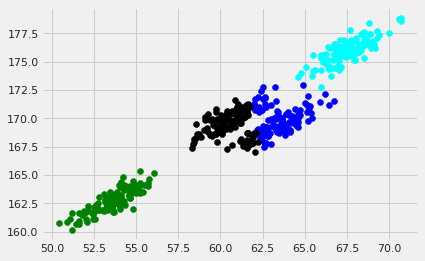

In [76]:
#training k-means model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

#predictions from kmeans
pred = kmeans.predict(data)
frame = pd.DataFrame(data)
frame['cluster'] = pred
frame.columns = ['Weight', 'Height', 'cluster']

#plotting results
color=['blue','green','cyan', 'black']
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"],c=color[k])
plt.show()

In [77]:
data = pd.read_csv('https://raw.githubusercontent.com/maxtran1997gmail/Files/main/Clustering_gmm.csv')

In [79]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm.fit(data)

#predictions from gmm
labels = gmm.predict(data)

array([1, 0, 3, 2, 0, 3, 1, 0, 0, 0, 3, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 3,
       2, 0, 2, 3, 0, 0, 3, 3, 0, 0, 0, 0, 3, 0, 0, 3, 3, 0, 1, 1, 0, 0,
       2, 3, 2, 1, 2, 0, 3, 1, 0, 3, 1, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3,
       1, 0, 0, 0, 1, 3, 2, 1, 0, 0, 0, 1, 1, 3, 0, 0, 3, 1, 1, 3, 1, 0,
       0, 1, 1, 2, 0, 0, 0, 2, 1, 2, 3, 0, 2, 1, 1, 1, 2, 3, 0, 2, 3, 2,
       0, 2, 0, 3, 0, 3, 2, 3, 3, 1, 0, 3, 1, 1])

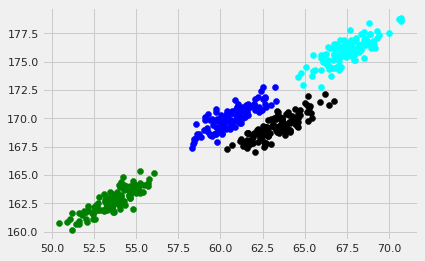

In [78]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm.fit(data)

#predictions from gmm
labels = gmm.predict(data)
frame = pd.DataFrame(data)
frame['cluster'] = labels
frame.columns = ['Weight', 'Height', 'cluster']

color=['blue','green','cyan', 'black']
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"],c=color[k])
plt.show()